In [14]:
import numpy as np
import random
import math
from matplotlib import pyplot as plt

In [15]:
class TSPGenes:
    def __init__(self, population_size=10, total_cities=20):
        self.population = population_size
        self.number_of_elites = 0
        self.total_cities = total_cities
        self.genepool = np.empty((self.population, self.total_cities))
        for p in range(self.population):
            for i in range(self.total_cities):
                self.genepool[p][i] = random.randint(0, self.total_cities-1-i)
        self.fitness = np.zeros(self.population)
        self.best_fitness = []
        self.best_genotype = []
        
    def gene_to_cities(self, index=None):
        cities = np.empty(self.total_cities)
        gene = self.genepool[index]
        tmp = np.array(range(self.total_cities))
        i=0
        for c in gene:
            cities[i] = tmp[int(c)]
            tmp = np.delete(tmp, int(c))
            i+=1
        return cities
            
    def cities_to_gene(self, cities=None):
        gene = np.empty(self.total_cities)
        tmp = np.array(range(self.total_cities))
        i=0
        for c in cities:
            gene[i] = np.where(tmp==int(c))[0][0]
            tmp = np.delete(tmp, int(gene[i]))
            i+=1
        return gene
        
    def sorting(self):
        #Largest Fitness to Smallest Fitness
        sorting_order = np.argsort(-self.fitness)
        self.genepool = self.genepool[sorting_order]
        self.fitness = self.fitness[sorting_order]
        #Printing and Saving best genes and fitness
        best = self.fitness[0]
        print("Best Fitness: ", best)
        self.best_fitness.append(best)
        self.best_genotype.append(self.genepool[0])
        
    def selection(self):
        fit = self.fitness - np.amin(self.fitness)
        individual_count = np.nan_to_num((self.population)*fit/np.sum(fit)) + 1
        next_genepool = np.empty((self.population, self.total_cities))
        i=0
        for individual in range(self.population):
            for count in range(int(individual_count[individual])):
                next_genepool[i] = self.genepool[individual].copy()
                i+=1
                if i>=self.population:
                    self.genepool = next_genepool
                    return
        
    def crossover(self, index_a=None, index_b=None):
        border = random.sample(range(1, self.total_cities), 1)[0]
        a_snippet, b_snippet = self.genepool[index_a][border:], self.genepool[index_b][border:]
        self.genepool[index_a][border:], self.genepool[index_b][border:] = b_snippet, a_snippet
        
    def mutation(self, index=None):
        target_cities = self.gene_to_cities(index)
        slot1 = random.sample(range(self.total_cities), 1)[0]
        slot2 = np.where(target_cities==slot1)[0][0]
        city1 = target_cities[slot1]
        city2 = target_cities[slot2]
        target_cities[slot1], target_cities[slot2] = city2, city1
        self.genepool[index] = self.cities_to_gene(target_cities)
            
    def inversion(self, index=None):
        target_cities = self.gene_to_cities(index)
        borders = random.sample(range(self.total_cities+1), 2)
        borders.sort()
        target_cities[borders[0]:borders[1]] = np.flip(target_cities[borders[0]:borders[1]])
        self.genepool[index] = self.cities_to_gene(target_cities)
        
    def optimizer(self, crossover_ratio=None, mutation_ratio=None, inversion_ratio=None, number_of_elites=None):
        self.number_of_elites = number_of_elites
        self.selection()
        """New Genotype is in the descending order of corresponding fitness"""
        #Perform genetic operation
        for iteration in range(int(self.population*crossover_ratio/2)):
            parents = random.sample(range(self.number_of_elites, self.population), 2)
            self.crossover(parents[0], parents[1])
        for iteration in range(int(self.population*mutation_ratio)):
            self.mutation(random.sample(range(self.number_of_elites, self.population), 1)[0])
        for iteration in range(int(self.population*inversion_ratio)):
            self.inversion(random.sample(range(self.number_of_elites, self.population), 1)[0])

In [16]:
class TSP:
    def __init__(self, city_size=None):
        self.city_size = city_size
        self.distance_matrix = np.zeros((self.city_size, self.city_size))
        self.city_locations = np.zeros((self.city_size, 2))
        
    def calculate_distances(self):
        for i in range(self.city_size-1):
            for j in range(i+1, self.city_size):
                self.distance_matrix[i][j] = ((self.city_locations[i][0]-self.city_locations[j][0])**2 + (self.city_locations[i][1]-self.city_locations[j][1])**2)**1/2
            
    def fitness_function(self, city_vector):
        fitness = 0
        for i in range(self.city_size-1):
            cindex = [city_vector[i], city_vector[i+1]]
            cindex.sort()
            fitness += self.distance_matrix[int(cindex[0])][int(cindex[1])]
        return 1/fitness

Best Fitness:  0.07798500946700444


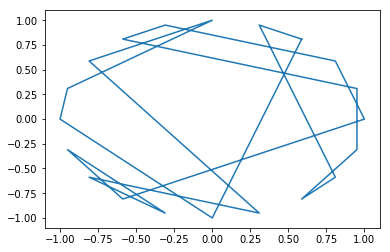

Best Fitness:  0.07798500946700444


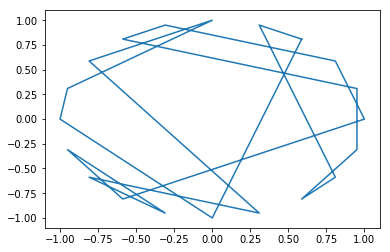

Best Fitness:  0.08543398973667907


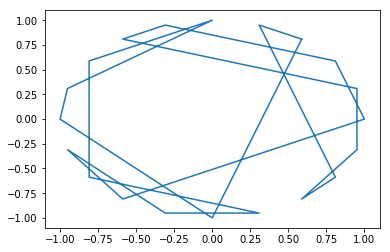

Best Fitness:  0.08543398973667907


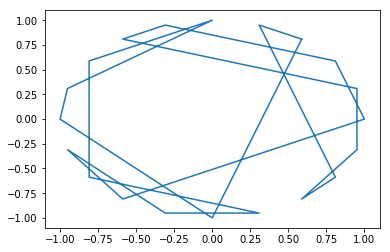

Best Fitness:  0.09497241913964784


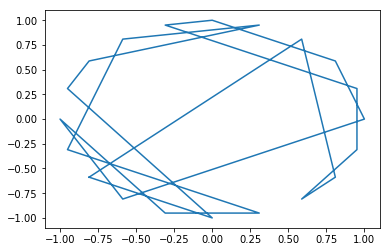

Best Fitness:  0.09497241913964784


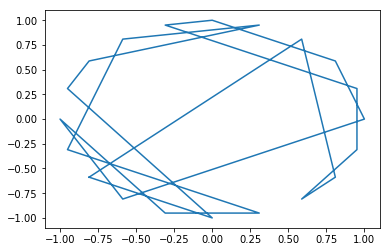

Best Fitness:  0.09596133121870018


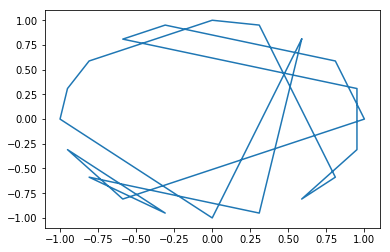

Best Fitness:  0.09922292365066473


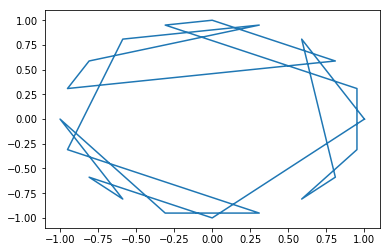

Best Fitness:  0.10563537887187599


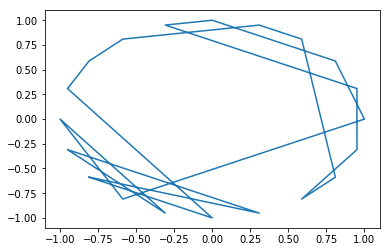

Best Fitness:  0.10909763588469733


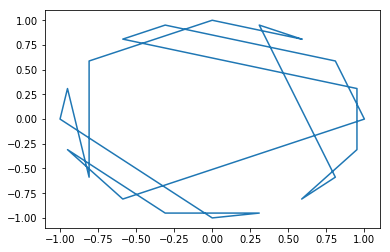

Best Fitness:  0.10909763588469733


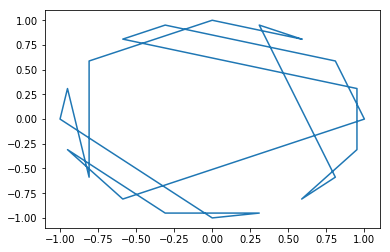

Best Fitness:  0.10909763588469733


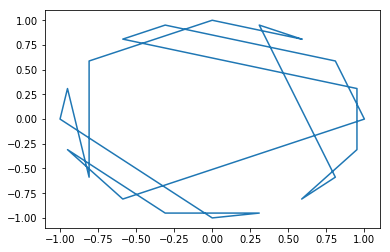

Best Fitness:  0.1130136144749256


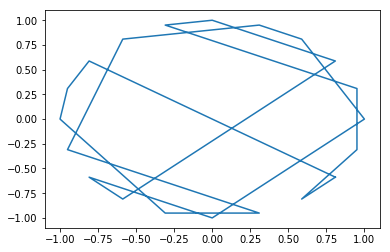

Best Fitness:  0.1130136144749256


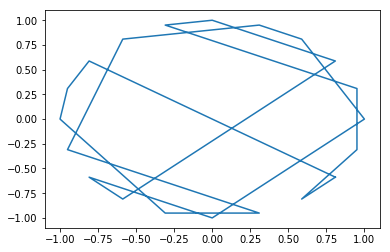

Best Fitness:  0.11785198021446719


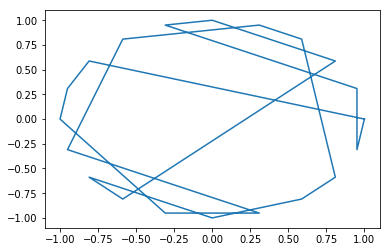

Best Fitness:  0.12475876473809332


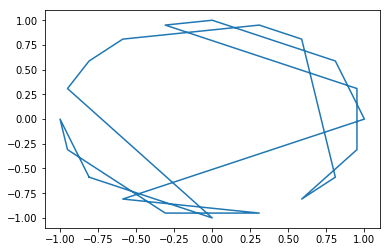

Best Fitness:  0.12475876473809332


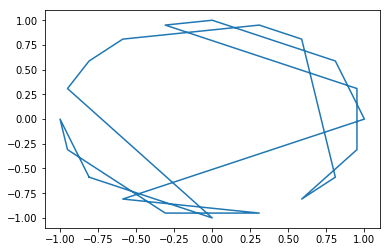

Best Fitness:  0.12475876473809332


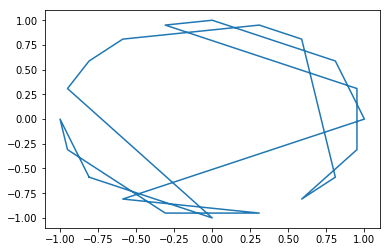

Best Fitness:  0.13068141287903823


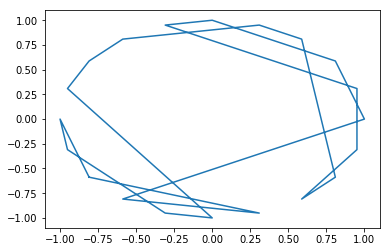

Best Fitness:  0.14881315828560263


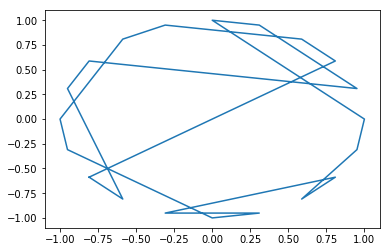

Best Fitness:  0.14881315828560263


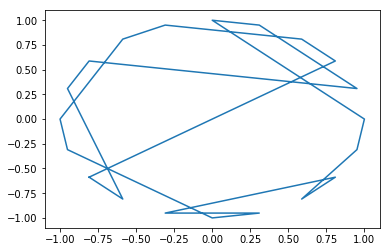

Best Fitness:  0.15058781222025053


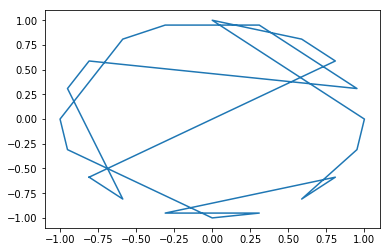

Best Fitness:  0.16227708869855856


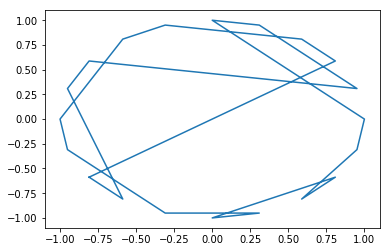

Best Fitness:  0.16227708869855856


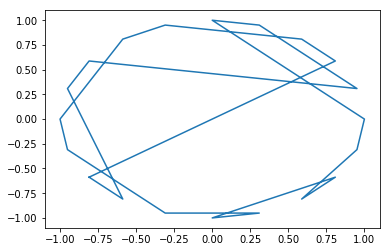

Best Fitness:  0.16655798977900144


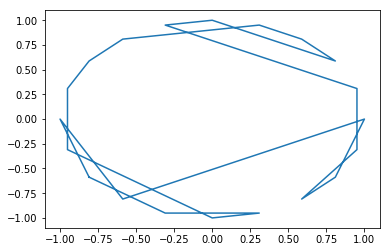

Best Fitness:  0.16996595793770447


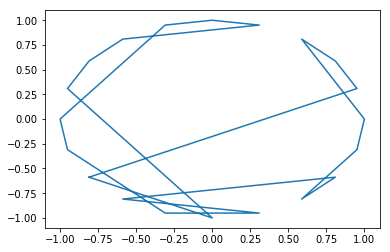

Best Fitness:  0.16996595793770447


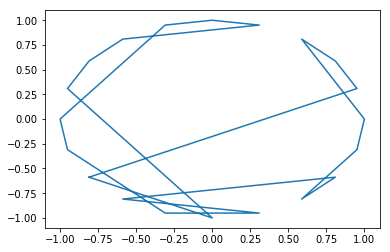

Best Fitness:  0.16996595793770447


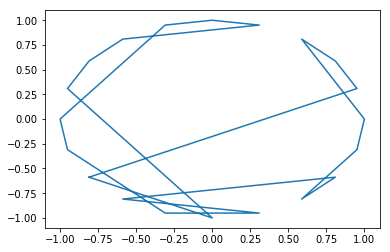

Best Fitness:  0.16996595793770447


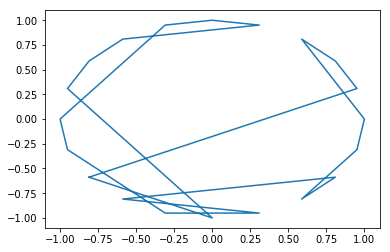

Best Fitness:  0.16996595793770447


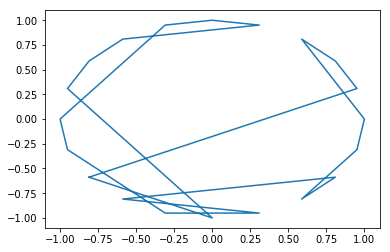

Best Fitness:  0.1948538845677512


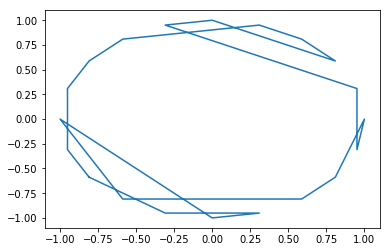

Best Fitness:  0.1948538845677512


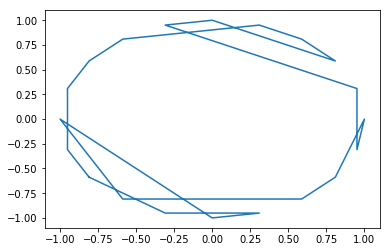

Best Fitness:  0.20273799335303258


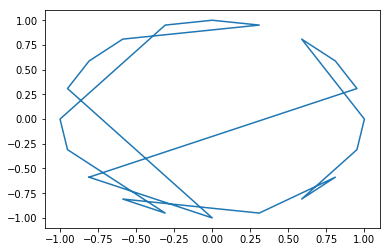

Best Fitness:  0.2120192153643644


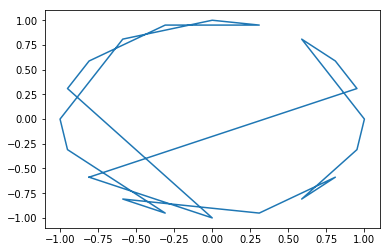

Best Fitness:  0.2120192153643644


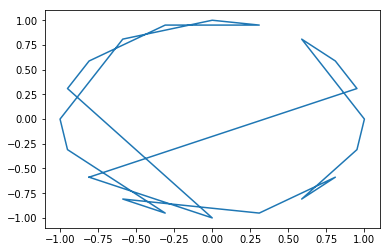

Best Fitness:  0.2120192153643644


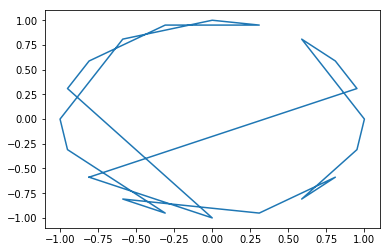

Best Fitness:  0.2120192153643644


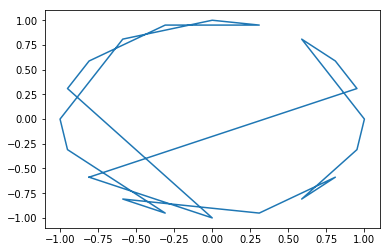

Best Fitness:  0.3168511426961379


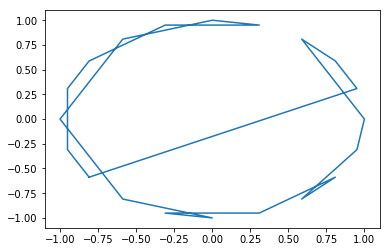

Best Fitness:  0.3168511426961379


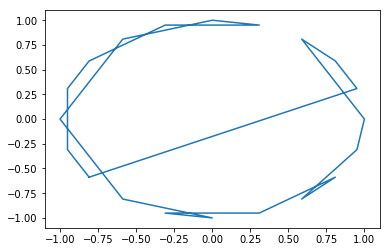

Best Fitness:  0.3168511426961379


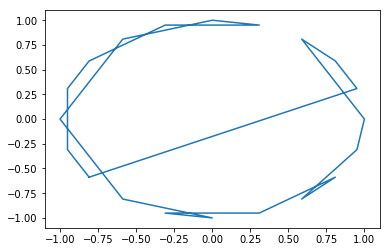

Best Fitness:  0.3168511426961379


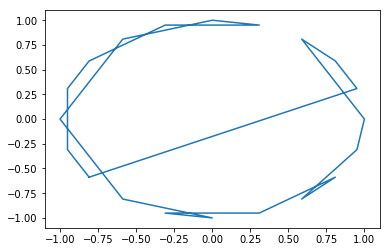

Best Fitness:  0.3168511426961379


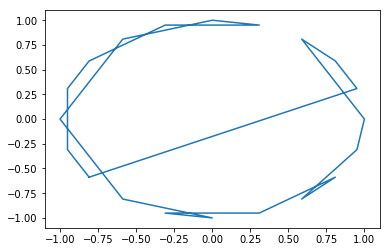

Best Fitness:  0.3168511426961379


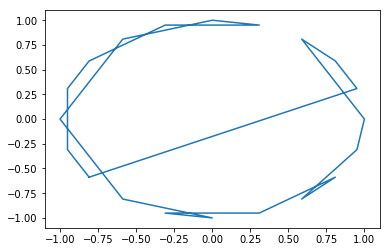

Best Fitness:  0.3168511426961379


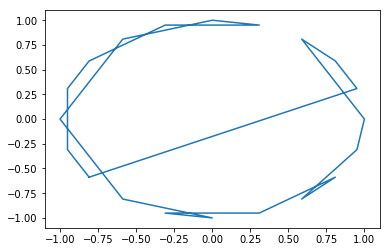

Best Fitness:  0.3168511426961379


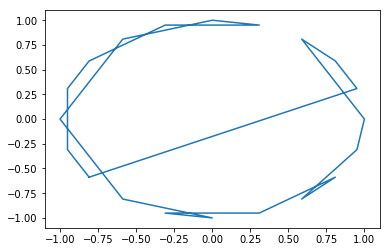

Best Fitness:  0.3168511426961379


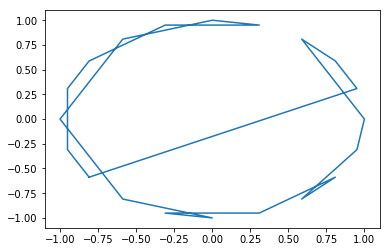

Best Fitness:  0.32500624671111594


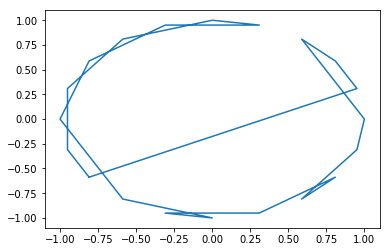

Best Fitness:  0.32500624671111594


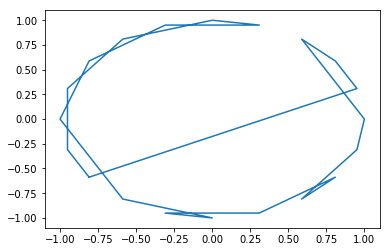

Best Fitness:  0.34819218967751914


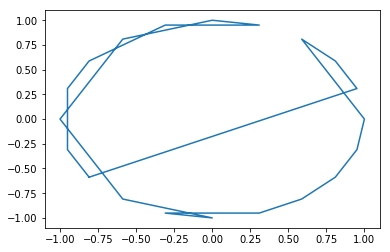

Best Fitness:  0.34819218967751914


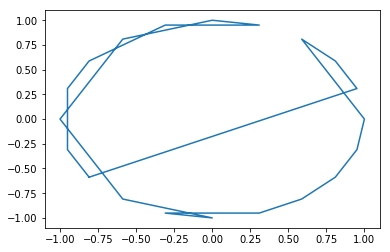

Best Fitness:  0.34819218967751914


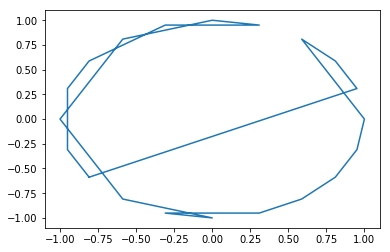

Best Fitness:  0.34819218967751914


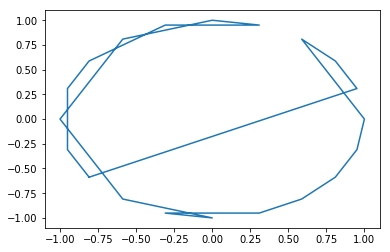

Best Fitness:  0.35806552886856924


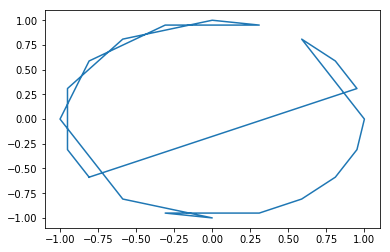

Best Fitness:  0.39861189785658424


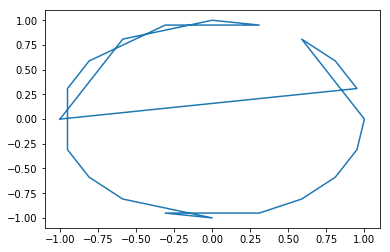

Best Fitness:  0.39861189785658424


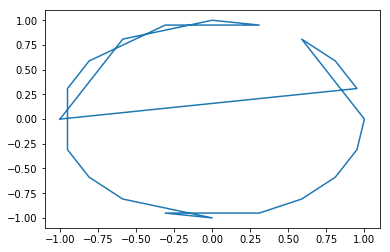

Best Fitness:  0.39861189785658424


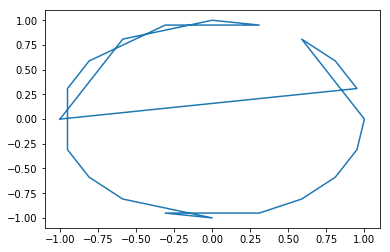

Best Fitness:  0.39861189785658424


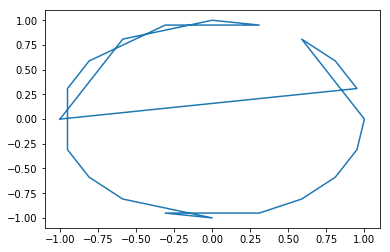

Best Fitness:  0.39861189785658424


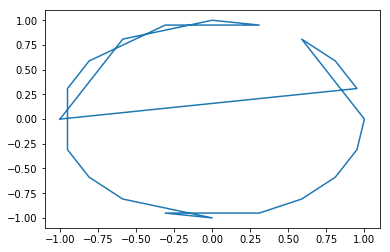

Best Fitness:  0.39861189785658424


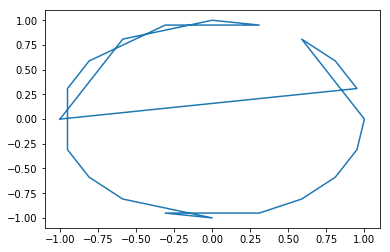

Best Fitness:  0.4116050174619775


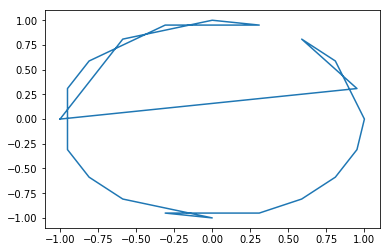

Best Fitness:  0.4116050174619775


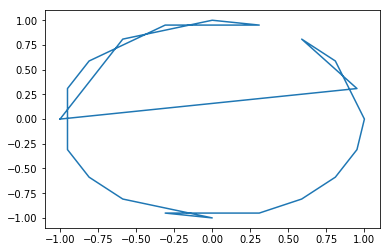

Best Fitness:  0.4116050174619775


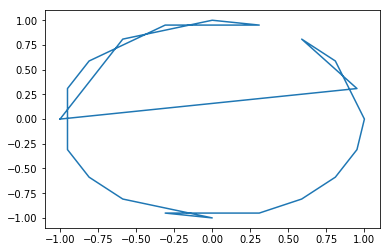

Best Fitness:  0.4116050174619775


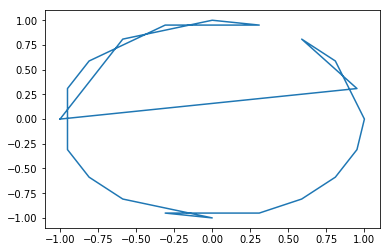

Best Fitness:  0.4116050174619775


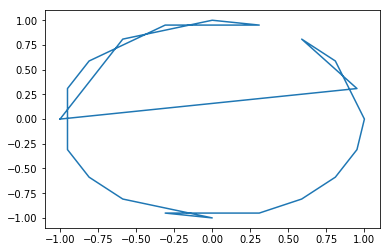

Best Fitness:  0.4116050174619775


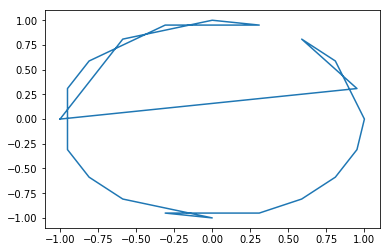

Best Fitness:  0.4116050174619775


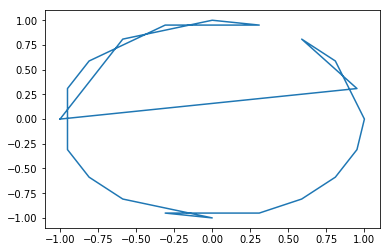

Best Fitness:  0.4116050174619775


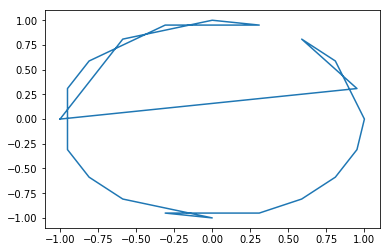

Best Fitness:  0.4116050174619775


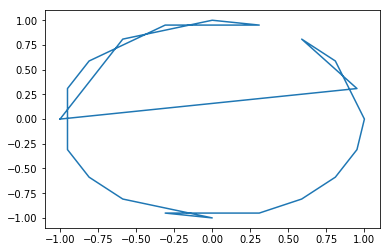

Best Fitness:  0.4116050174619775


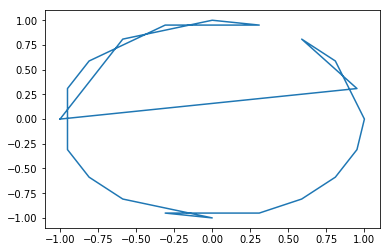

Best Fitness:  0.4116050174619775


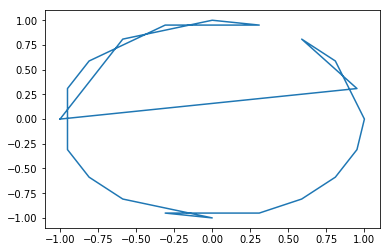

Best Fitness:  0.4116050174619775


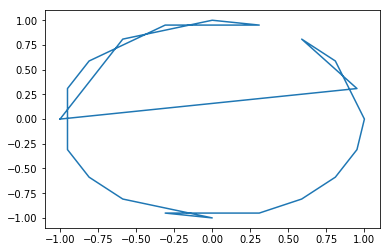

Best Fitness:  0.4116050174619775


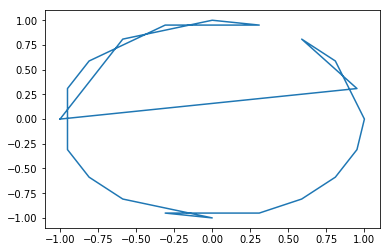

Best Fitness:  0.4116050174619775


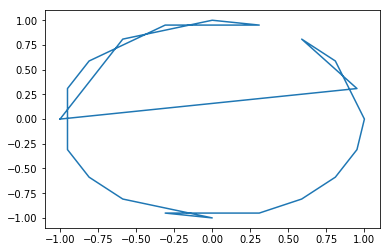

Best Fitness:  0.4116050174619775


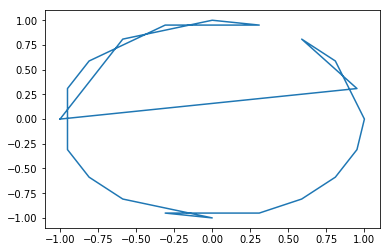

Best Fitness:  0.4116050174619775


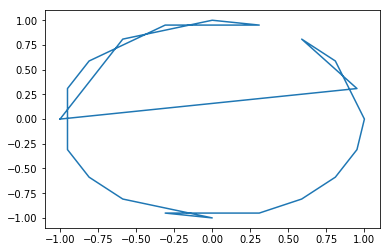

Best Fitness:  0.4116050174619775


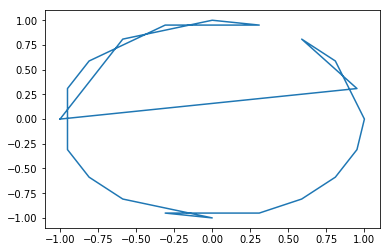

Best Fitness:  0.4116050174619775


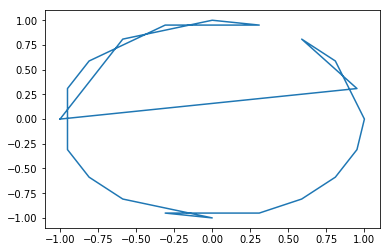

Best Fitness:  0.4116050174619775


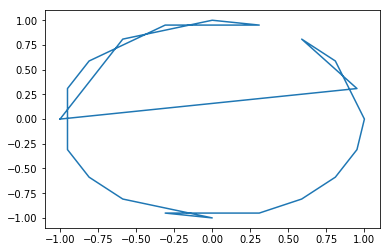

Best Fitness:  0.4116050174619775


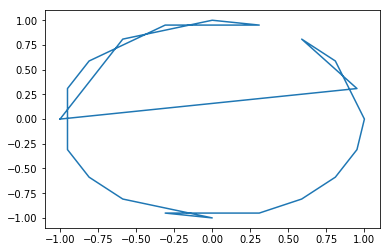

Best Fitness:  0.4116050174619775


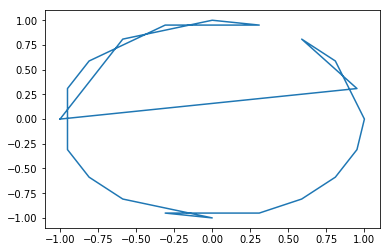

Best Fitness:  0.4116050174619775


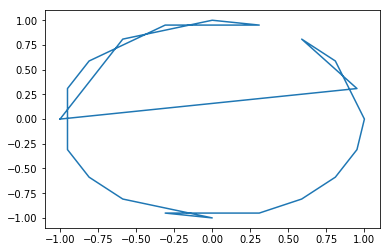

Best Fitness:  0.4116050174619775


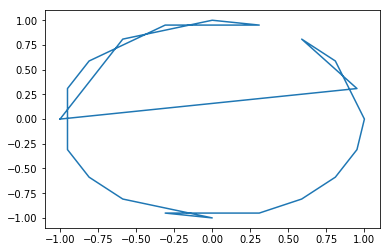

Best Fitness:  0.4116050174619775


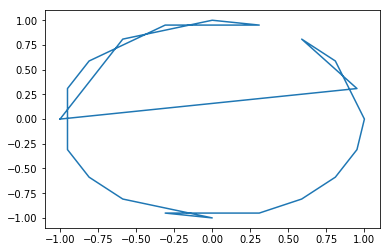

Best Fitness:  0.4116050174619775


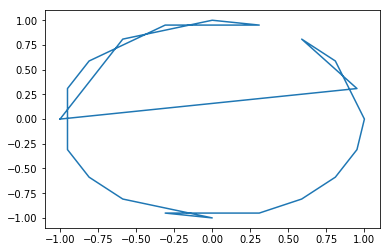

Best Fitness:  0.4116050174619775


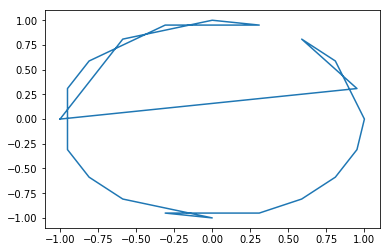

Best Fitness:  0.43716341818877763


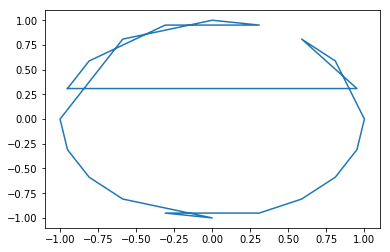

Best Fitness:  0.43716341818877763


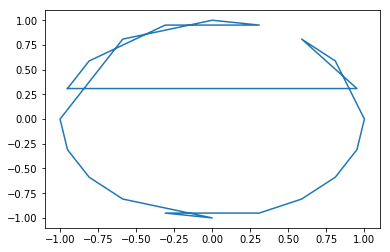

Best Fitness:  0.43716341818877763


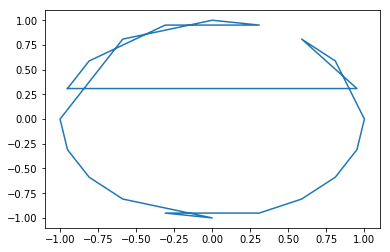

Best Fitness:  0.43716341818877763


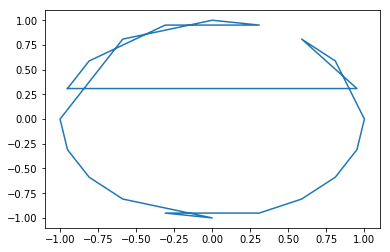

Best Fitness:  0.43716341818877763


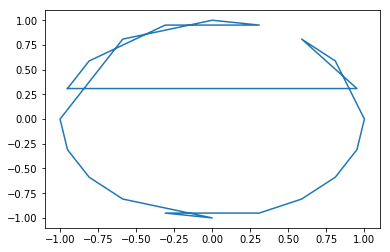

Best Fitness:  0.43716341818877763


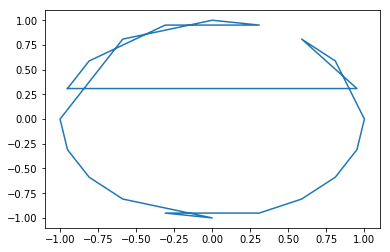

Best Fitness:  0.43716341818877763


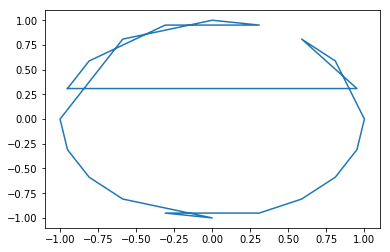

Best Fitness:  0.43716341818877763


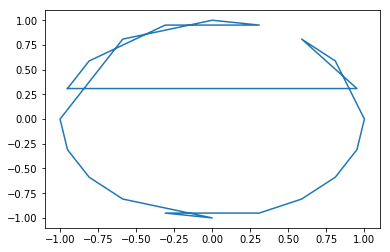

Best Fitness:  0.43716341818877763


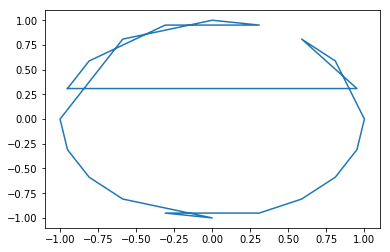

Best Fitness:  0.43716341818877763


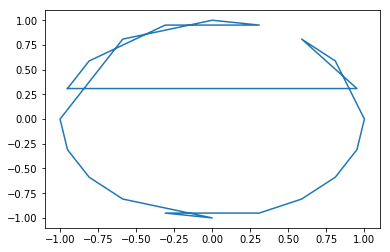

Best Fitness:  0.43716341818877763


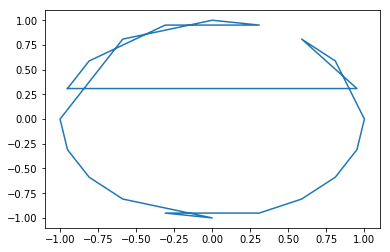

Best Fitness:  0.43716341818877763


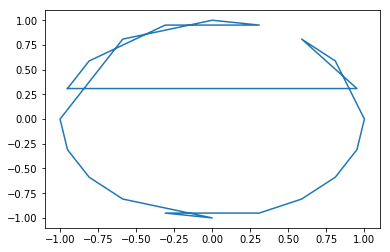

Best Fitness:  0.43716341818877763


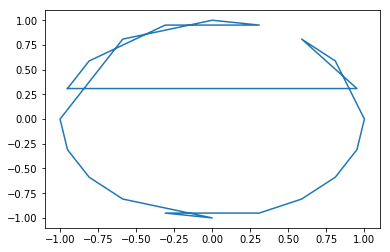

Best Fitness:  0.43716341818877763


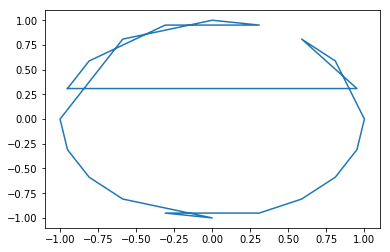

Best Fitness:  0.4528407381239431


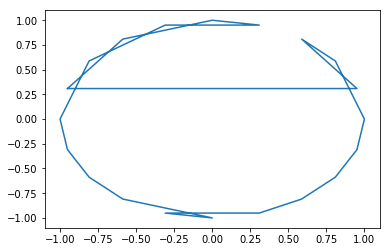

Best Fitness:  0.4528407381239431


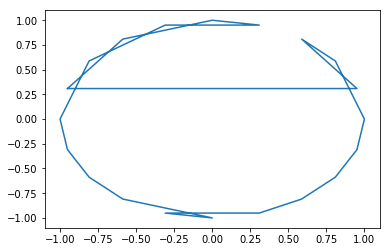

Best Fitness:  0.4528407381239431


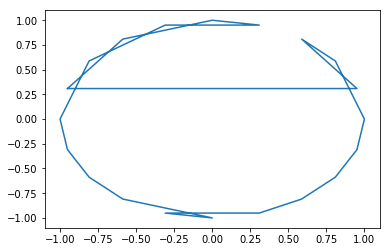

Best Fitness:  0.4528407381239431


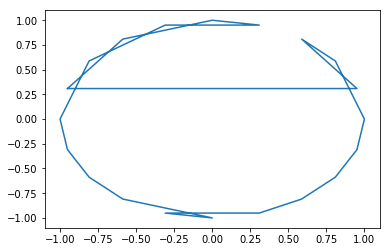

Best Fitness:  0.4528407381239431


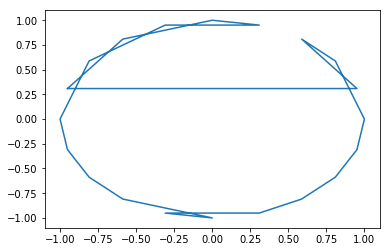

Best Fitness:  0.48397033018690266


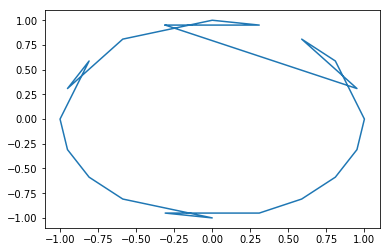

Best Fitness:  0.48397033018690266


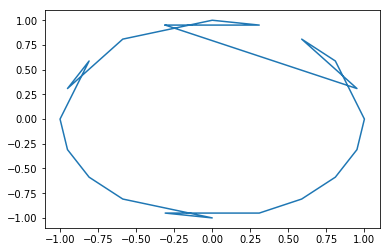

Best Fitness:  0.48397033018690266


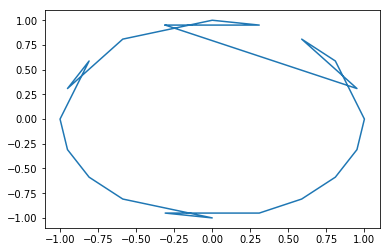

Best Fitness:  0.48397033018690266


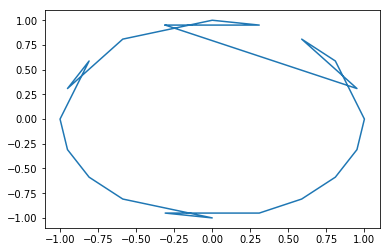

Best Fitness:  0.48397033018690266


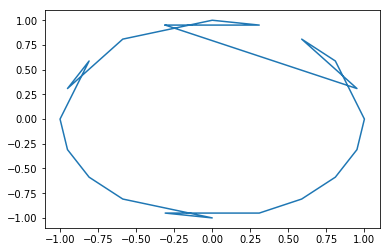

Best Fitness:  0.48397033018690266


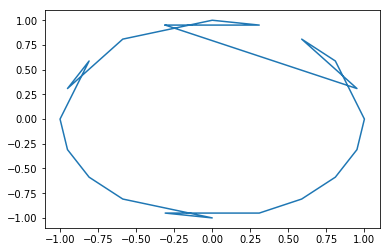

Best Fitness:  0.48397033018690266


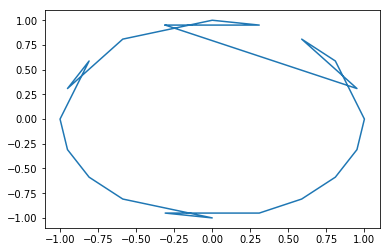

Best Fitness:  0.48397033018690266


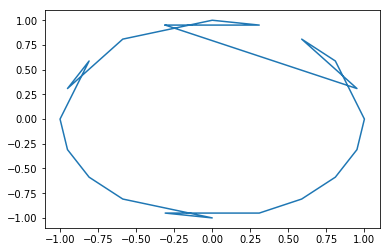

Best Fitness:  0.48397033018690266


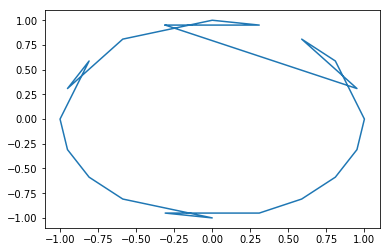

Best Fitness:  0.48397033018690266


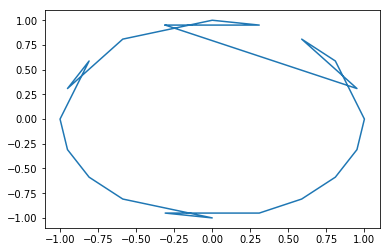

Best Fitness:  0.48397033018690266


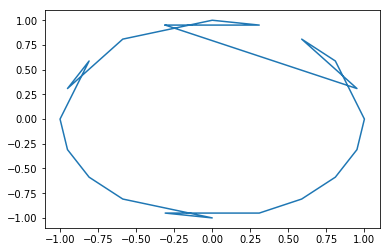

Best Fitness:  0.48397033018690266


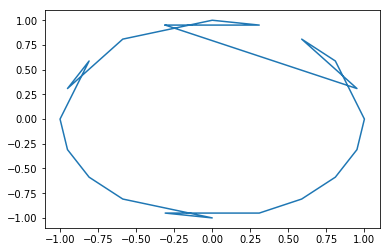

Best Fitness:  0.48397033018690266


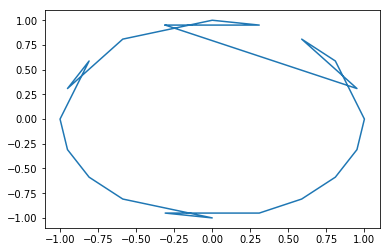

Best Fitness:  0.48397033018690266


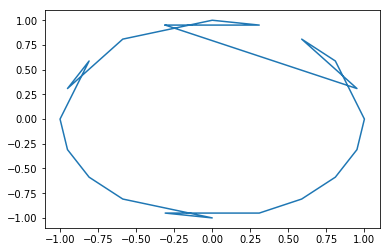

Best Fitness:  0.48397033018690266


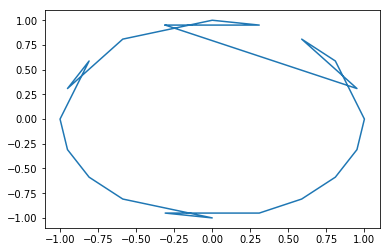

Best Fitness:  0.48397033018690266


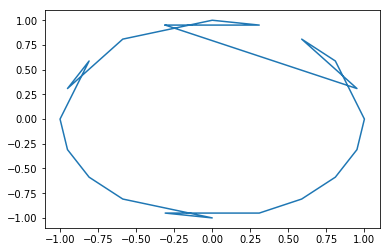

Best Fitness:  0.48397033018690266


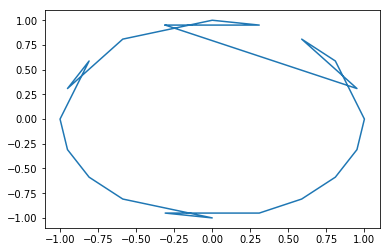

Best Fitness:  0.48397033018690266


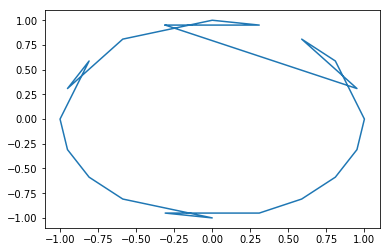

Best Fitness:  0.5196957291715324


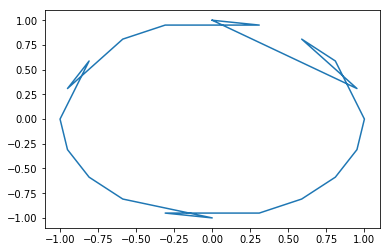

Best Fitness:  0.5196957291715324


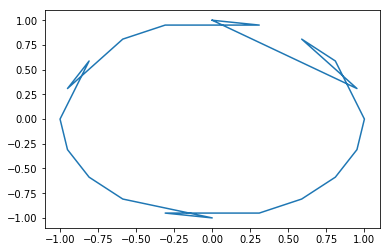

Best Fitness:  0.5196957291715324


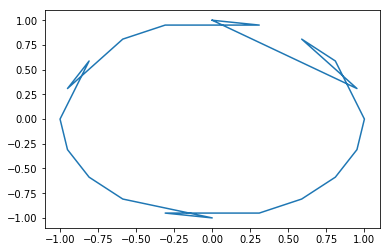

Best Fitness:  0.5611158010627255


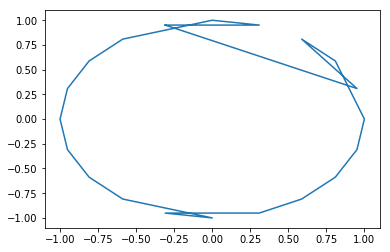

Best Fitness:  0.5611158010627255


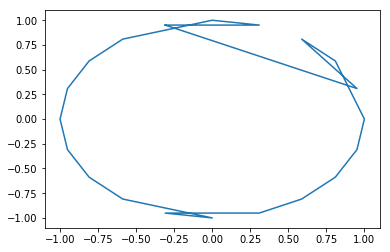

Best Fitness:  0.5611158010627255


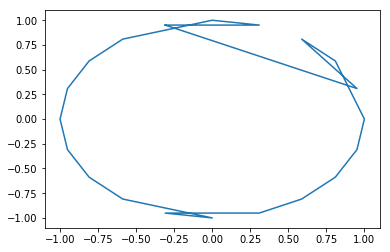

Best Fitness:  0.5611158010627255


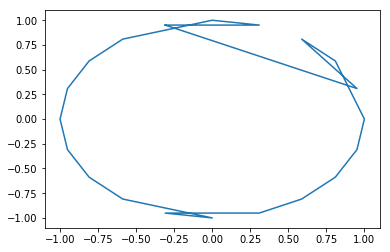

Best Fitness:  0.5611158010627255


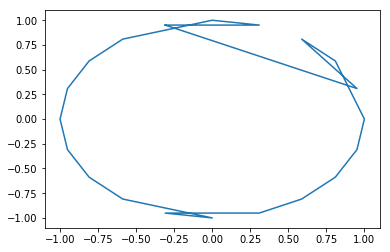

Best Fitness:  0.5611158010627255


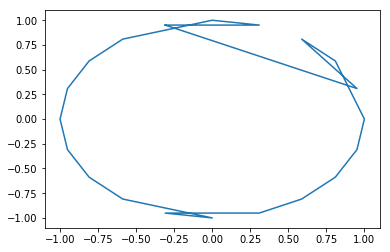

Best Fitness:  0.5611158010627255


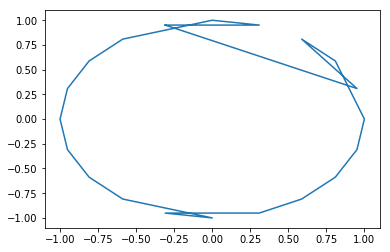

Best Fitness:  0.5611158010627255


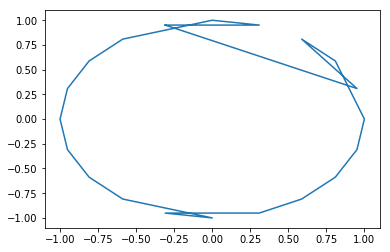

Best Fitness:  0.6675191874294092


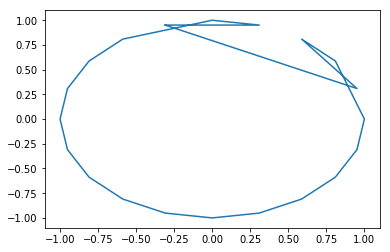

Best Fitness:  0.6675191874294092


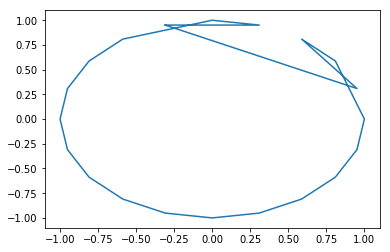

Best Fitness:  0.6675191874294092


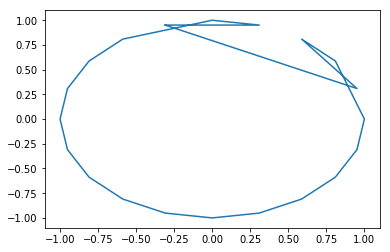

Best Fitness:  0.6675191874294092


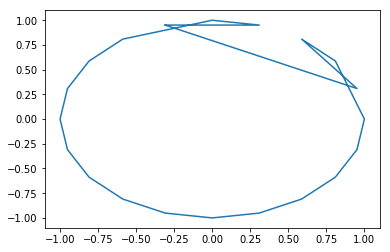

Best Fitness:  0.6675191874294092


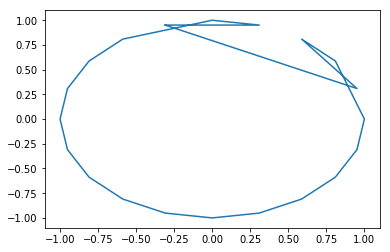

Best Fitness:  0.6675191874294092


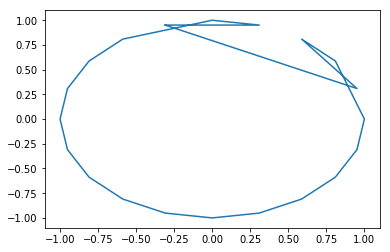

Best Fitness:  0.6675191874294092


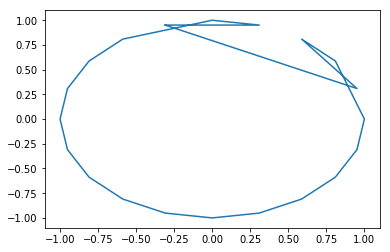

Best Fitness:  0.6675191874294092


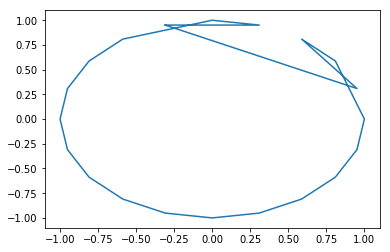

Best Fitness:  0.6675191874294092


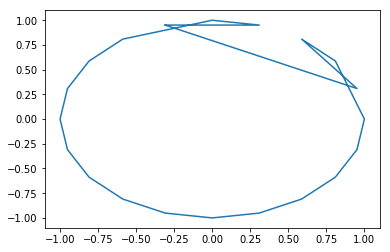

Best Fitness:  0.6675191874294092


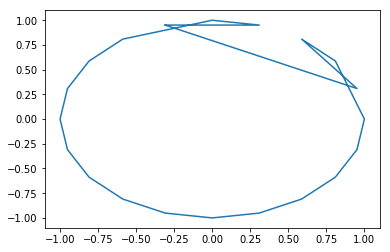

Best Fitness:  0.6675191874294092


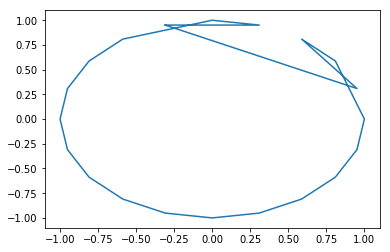

Best Fitness:  0.737438786929974


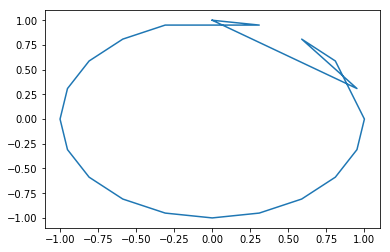

Best Fitness:  0.737438786929974


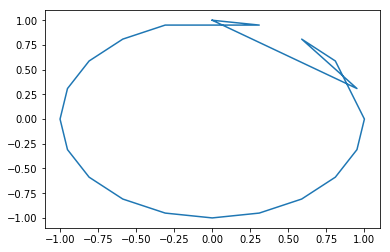

Best Fitness:  0.737438786929974


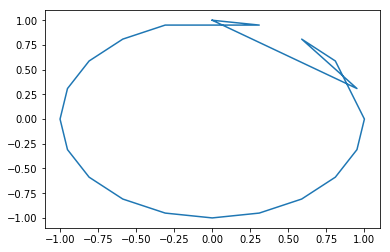

Best Fitness:  0.737438786929974


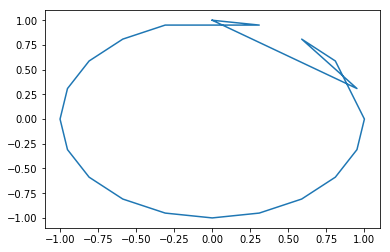

Best Fitness:  0.737438786929974


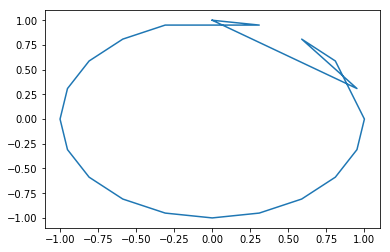

Best Fitness:  0.737438786929974


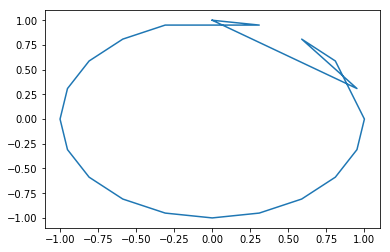

Best Fitness:  0.737438786929974


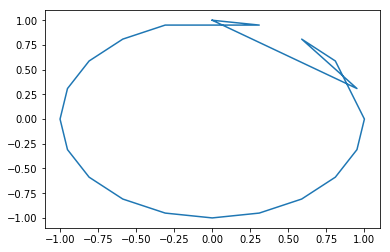

Best Fitness:  0.737438786929974


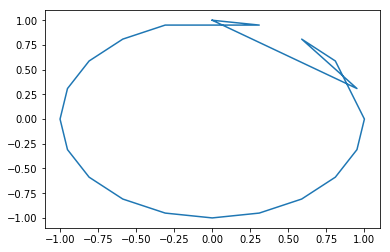

Best Fitness:  0.737438786929974


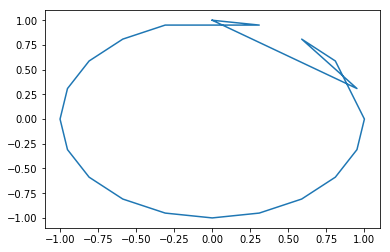

Best Fitness:  0.737438786929974


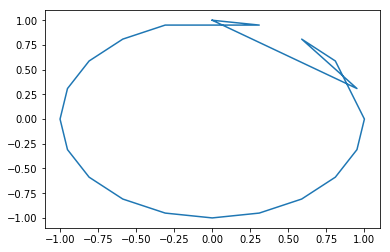

Best Fitness:  0.737438786929974


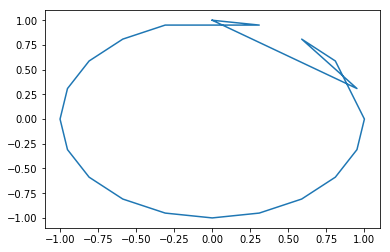

Best Fitness:  0.737438786929974


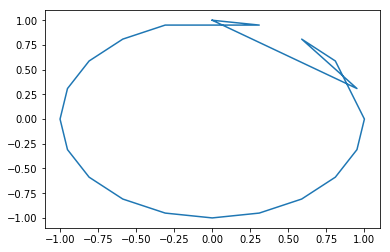

Best Fitness:  0.737438786929974


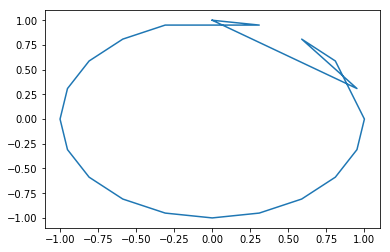

Best Fitness:  0.737438786929974


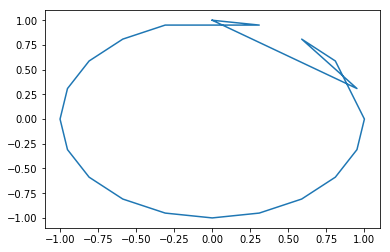

Best Fitness:  0.737438786929974


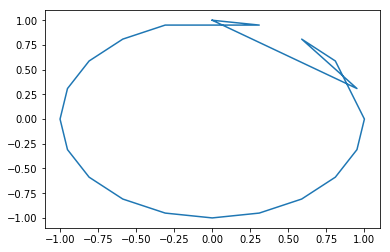

Best Fitness:  0.737438786929974


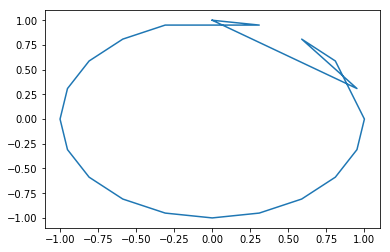

Best Fitness:  0.737438786929974


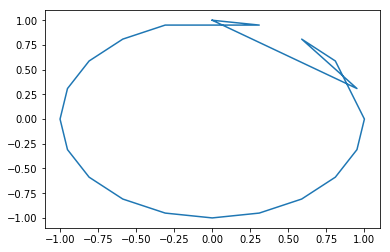

Best Fitness:  0.737438786929974


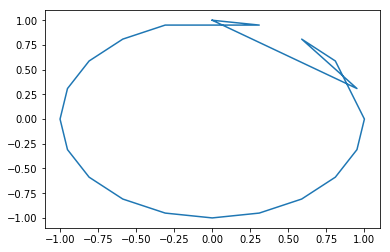

Best Fitness:  0.823719677479158


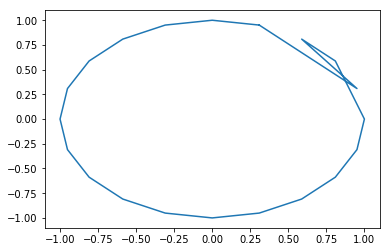

Best Fitness:  0.823719677479158


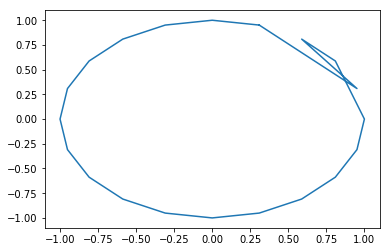

Best Fitness:  0.823719677479158


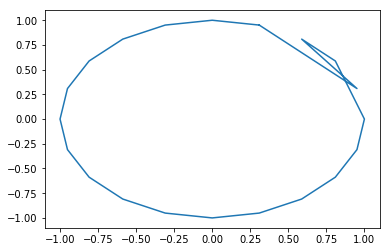

Best Fitness:  0.823719677479158


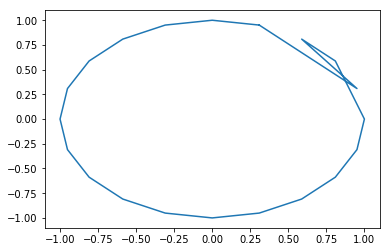

Best Fitness:  0.823719677479158


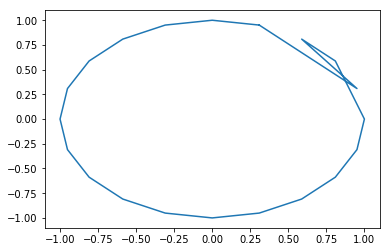

Best Fitness:  0.823719677479158


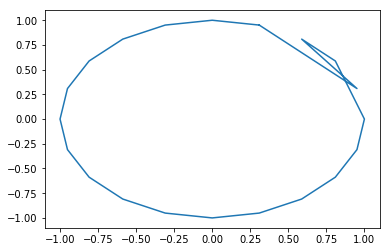

Best Fitness:  0.823719677479158


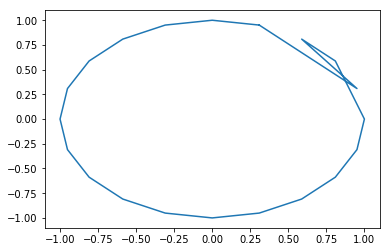

Best Fitness:  0.823719677479158


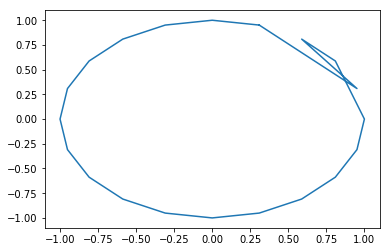

Best Fitness:  0.823719677479158


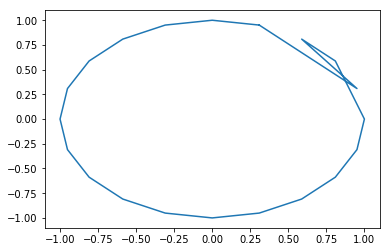

Best Fitness:  0.823719677479158


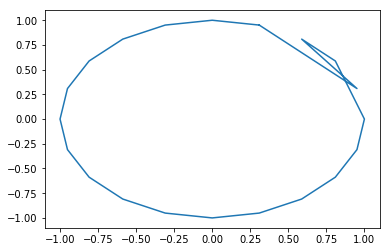

Best Fitness:  0.823719677479158


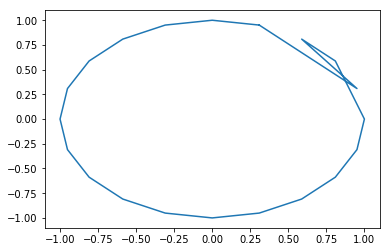

Best Fitness:  0.823719677479158


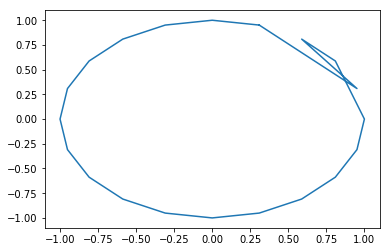

Best Fitness:  0.823719677479158


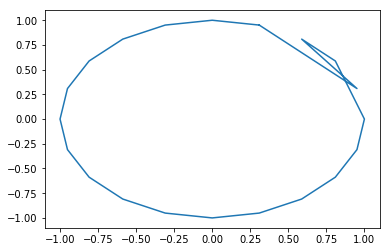

Best Fitness:  0.823719677479158


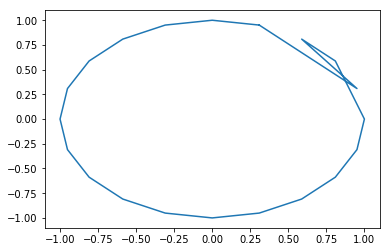

Best Fitness:  0.823719677479158


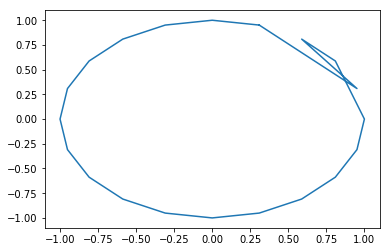

Best Fitness:  0.823719677479158


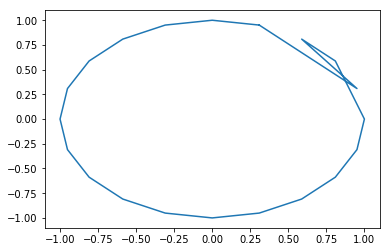

Best Fitness:  0.823719677479158


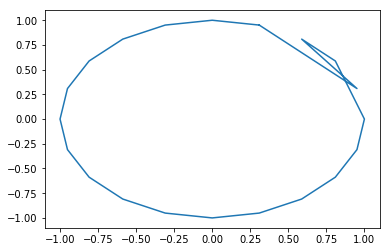

Best Fitness:  0.823719677479158


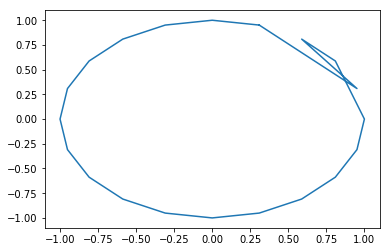

Best Fitness:  0.823719677479158


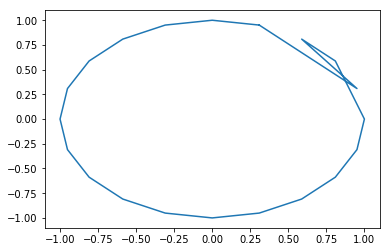

Best Fitness:  0.823719677479158


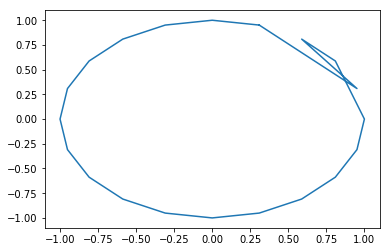

Best Fitness:  0.823719677479158


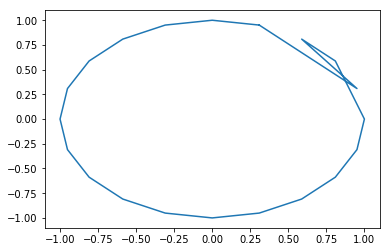

Best Fitness:  0.823719677479158


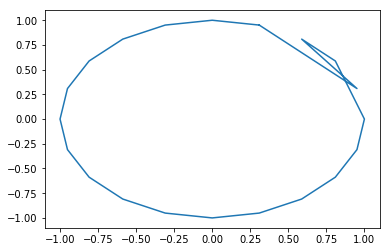

Best Fitness:  0.823719677479158


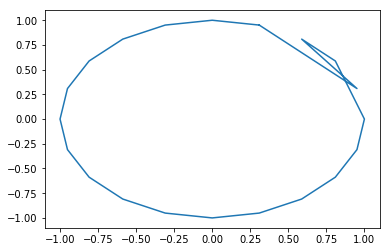

Best Fitness:  0.823719677479158


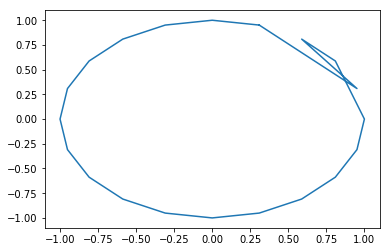

Best Fitness:  0.823719677479158


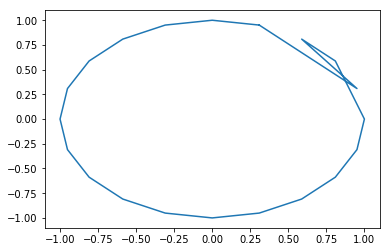

Best Fitness:  0.823719677479158


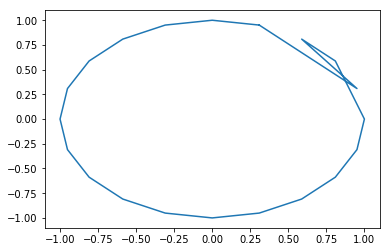

Best Fitness:  0.823719677479158


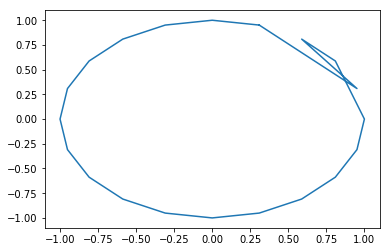

Best Fitness:  0.823719677479158


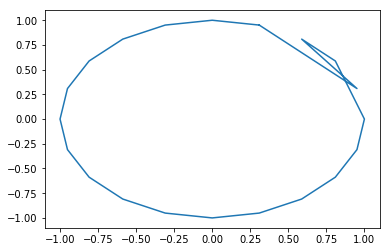

Best Fitness:  0.823719677479158


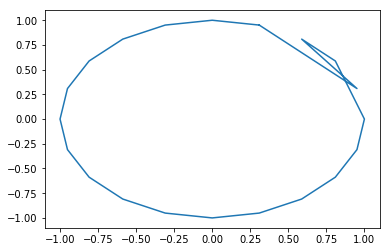

Best Fitness:  0.823719677479158


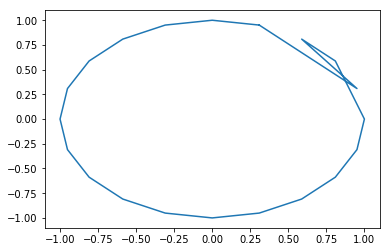

Best Fitness:  0.823719677479158


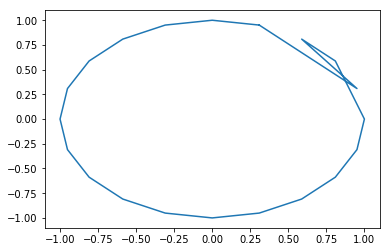

Best Fitness:  0.823719677479158


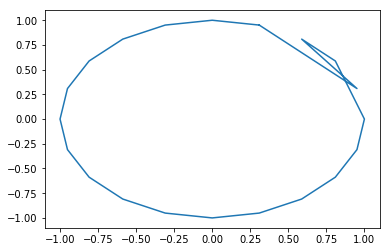

Best Fitness:  0.823719677479158


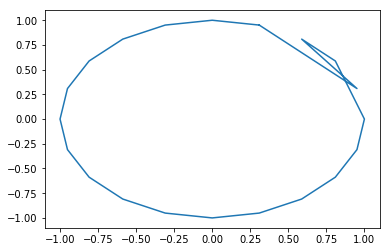

Best Fitness:  0.823719677479158


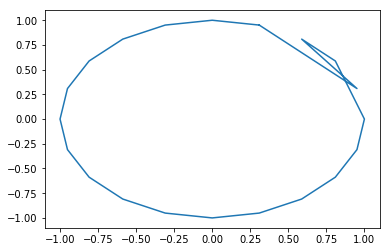

Best Fitness:  0.823719677479158


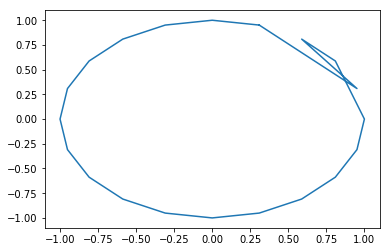

Best Fitness:  0.823719677479158


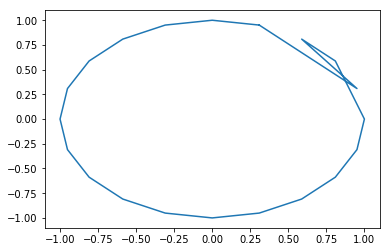

Best Fitness:  0.823719677479158


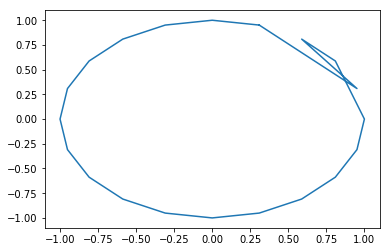

Best Fitness:  0.823719677479158


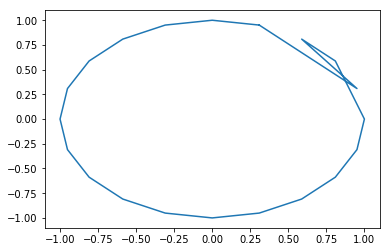

[ 4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19.  0.  2.
  3.  1.]


In [20]:
pop = 30
city_size = 20
test = TSPGenes(population_size=pop, total_cities=city_size)
tsp = TSP(city_size=city_size)
for i in range(city_size):
    tsp.city_locations[i][0] = math.cos(2*math.pi/city_size*i)
    tsp.city_locations[i][1] = math.sin(2*math.pi/city_size*i)
    
tsp.calculate_distances()
maxgen=250
for generation in range(maxgen):
    for i in range(pop):
        city = test.gene_to_cities(index=i)
        test.fitness[i] = tsp.fitness_function(city)
    test.sorting()
    %matplotlib inline
    visual = plt.plot(tsp.city_locations[np.array(np.append(test.gene_to_cities(index=0), test.gene_to_cities(index=0)[0]), dtype=int)].T[0], tsp.city_locations[np.array(np.append(test.gene_to_cities(index=0), test.gene_to_cities(index=0)[0]), dtype=int)].T[1])
    plt.show(visual)
    if generation < maxgen-1:
        test.optimizer(crossover_ratio=0.4, mutation_ratio=0.1, inversion_ratio=0.3, number_of_elites=1)
print(test.gene_to_cities(index=0))